Reference: https://h2o.ai/blog/shapley-values-a-gentle-introduction/

Dataset used is from: https://www.kaggle.com/datasets/budnyak/wine-rating-and-price?resource=download

Target to predict: 'Rating'

In [1]:
# Install packages if needed
# !pip install shap
# !pip install lightgbm

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob # To read the files in a directory

# Import shap and the model of choice
import shap
from lightgbm import LGBMRegressor

# Set style for shap plots
sns.set(style='ticks')

In [3]:
# Global Variables
DIRPATH = r'C:\Users\raman\OneDrive\Documents\Datasets\wine_rating_price'
FILENAMERED = '\Red.csv'
FILENAMEROSE = 'Rose.csv'
FILENAMESPARKLING = 'Sparkling.csv'
FILENAMEVARIETIES = 'Varieties.csv'
FILENAMEWHITE = 'White.csv'

In [4]:
df_red = pd.read_csv(DIRPATH+FILENAMERED)
print(f'The top few rows of Red wine data is:\n')
display(df_red.head())

The top few rows of Red wine data is:



,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [5]:
# Check for NaN values
print(df_red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB
None


In [6]:
# Drop the non-numeric columns. Alternatively, keep numeric columns.
df_red.drop(columns=['Name', 'Country', 'Region', 'Winery'], inplace=True)
display(df_red.head())
# Drop rows with 'N.V.' values
nonVintage = df_red.Year == 'N.V.'
df_red.drop(df_red[nonVintage].index, axis=0, inplace=True)
display(df_red)

,Rating,NumberOfRatings,Price,Year
0,4.2,100,95.00,2011
1,4.3,100,15.50,2017
2,3.9,100,7.45,2015
3,3.5,100,8.72,2019
4,3.9,100,29.15,2016


,Rating,NumberOfRatings,Price,Year
0,4.2,100,95.00,2011
1,4.3,100,15.50,2017
2,3.9,100,7.45,2015
3,3.5,100,8.72,2019
4,3.9,100,29.15,2016
...,...,...,...,...
8661,3.8,994,16.47,2016
8662,4.0,995,20.09,2016
8663,3.7,996,23.95,2010
8664,3.5,998,6.21,2019


In [7]:
print(df_red.info())
    # cast all columns to numeric
    df_red = df_red.apply(pd.to_numeric)
print(df_red.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 0 to 8665
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           8658 non-null   float64
 1   NumberOfRatings  8658 non-null   int64  
 2   Price            8658 non-null   float64
 3   Year             8658 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 338.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 0 to 8665
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           8658 non-null   float64
 1   NumberOfRatings  8658 non-null   int64  
 2   Price            8658 non-null   float64
 3   Year             8658 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 338.2 KB
None


In [11]:
# Define Features (X) and Target(y) for prediction
X = df_red[['Price', 'Year', 'NumberOfRatings']]
y = df_red.Rating

In [58]:
# Instantiate, fit model and use the fitted model to predict
model = LGBMRegressor()
model.fit(X,y)
y_prd = model.predict(X) # One step forward prediction
print(np.mean(y_prd))

3.890147830738982


In [30]:
%%time
# Instantiate Explainer and get Shap values object
explainer = shap.Explainer(model,X)
shap_values = explainer(X)

 98%|===================| 8466/8658 [00:17<00:00]        

CPU times: total: 16.4 s
Wall time: 16.6 s


In [34]:
# Examine the shap_values object
print(F'The Datatype of the shap_values object is: {type(shap_values)}')
print(f'The shape of shap_values object is: {shap_values.shape} rows and columns')
# How does the shape of shap_values correlate with the shape of the Features X?
print(f'Is it true that the shape of shap_values equals the shape of Features, X? {shap_values.shape == X.shape}')

The Datatype of the shap_values object is: <class 'shap._explanation.Explanation'>
The shape of shap_values object is: (8658, 3) rows and columns
Is it true that the shape of shap_values equals the shape of Features, X? True


.values =
array([-0.07753888,  0.0346482 ,  0.01430777])

.base_values =
3.892730293342654

.data =
array([  15.5, 2017. ,  100. ])


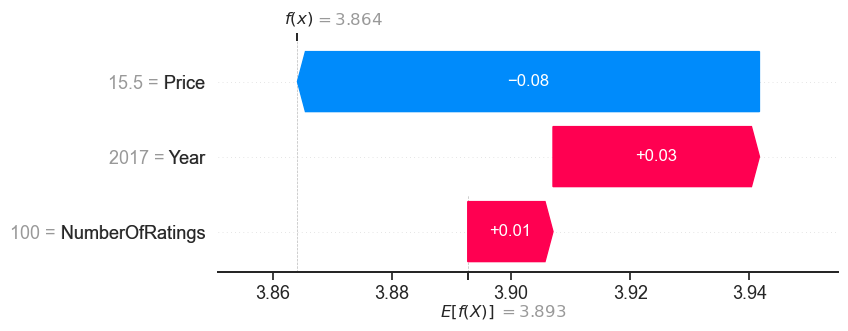

In [44]:
# The shap outputs for the second row
print(shap_values[1])

# Waterfall Plots
shap.plots.waterfall(shap_values[1])

- <b>.values</b> are the shap values, which are the contributions of each feature to the prediction
- <b>.base_values</b> is the expected value with all features
- <b>.data</b> is the corresponding row of the data in the feature dataframe X

Notice that the base_value of 3.893 is in the ballpark of the one-step ahead prediction done earlier, 3.890 (a multistep prediction will not deviate far from this number; it will actually be very close to 3.893). The base_value can be interpreted as the expected value of the model's prediction, indicated in the plot as E[f(X)]. A very good way to understanding expected value is to interpret it as the mean or average value.

The plot can be interpreted as both Year and NumberOfRatings tend to push up the average model prediction whereas Price tends to depress the average model prediction. The three Features together influence the average model prediction by -0.03 (0.01 + 0.03 - 0.08 = 0.03). This can also be verfied by the value of f(X) in the top left corner of the plot, F(X) = 3.864 (3.893 - 0.03 = 3.863, allowing for rounding).

.values =
array([-0.29428635,  0.02606614, -0.0138356 ])

.base_values =
3.892730293342654

.data =
array([   8.49, 2017.  ,  100.  ])


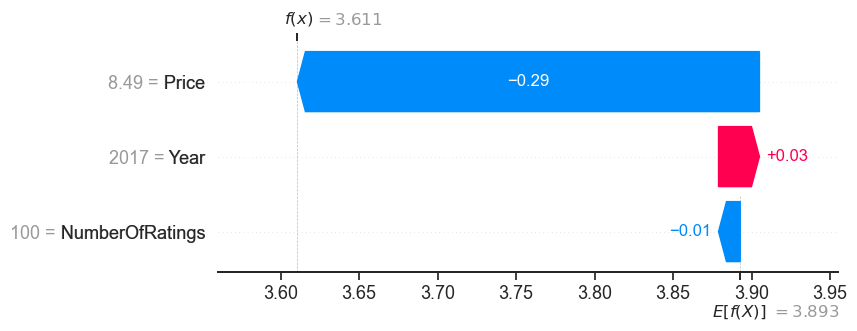

In [60]:
# Another waterflall plot to confirm the above interpretation
# The shap outputs for the second row
print(shap_values[14])

# Waterfall Plots
shap.plots.waterfall(shap_values[14])

Shap values may be different for same value of features. For example, in the two sets of shap_values above, the NumberOfRatings is 100, but the shap_values of the NumberOfRatings feature are noticeably different.

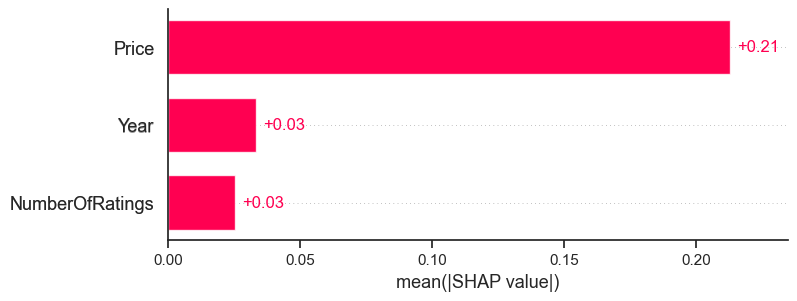

In [62]:
# The Feature Importance plot, using the shap_values object.
shap.plots.bar(shap_values)

Interpretation: The horizontal bar plot above shows the mean shap value for each feature. the takeaway is that the feature with the highest mean value influences the model the most. In this case we can see that over the entire dataset, Price most influences the predicted output.

### Potential areas for model improvement

- Encode categorical variables and introduce them as additional features
- Enable multistep forecasts in the model
- Create training and testing datasets - train the model on training data and test the model on testing data
- Tune the hyperparameters using cross validation

Although this tutorial stops here, do refer to the classic Lundberg & Lee paper. Additionally Lundberg in github page (https://github.com/slundberg/shap) has detailed explanations along with code.